In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform






Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Python version: 3.11.11
Tensorflow version: 2.18.0
Keras version: 3.8.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
print('Python version:',platform.python_version())
print('Tensorflow version:',tf.__version__)
print('Keras version:',tf.keras.__version__)

Python version: 3.11.11
Tensorflow version: 2.18.0
Keras version: 3.8.0


In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist_dataset.load_data()

print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

(_,IMAGE_WIDTH, IMAGE_HEIGHT)=x_train.shape
IMAGE_CHANNELS=1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


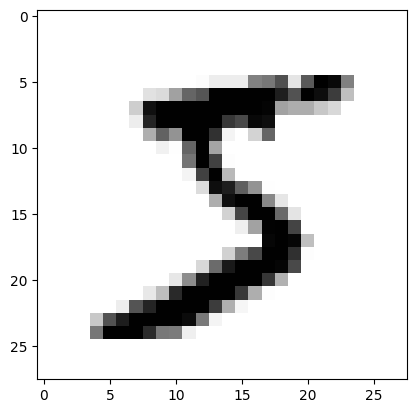

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

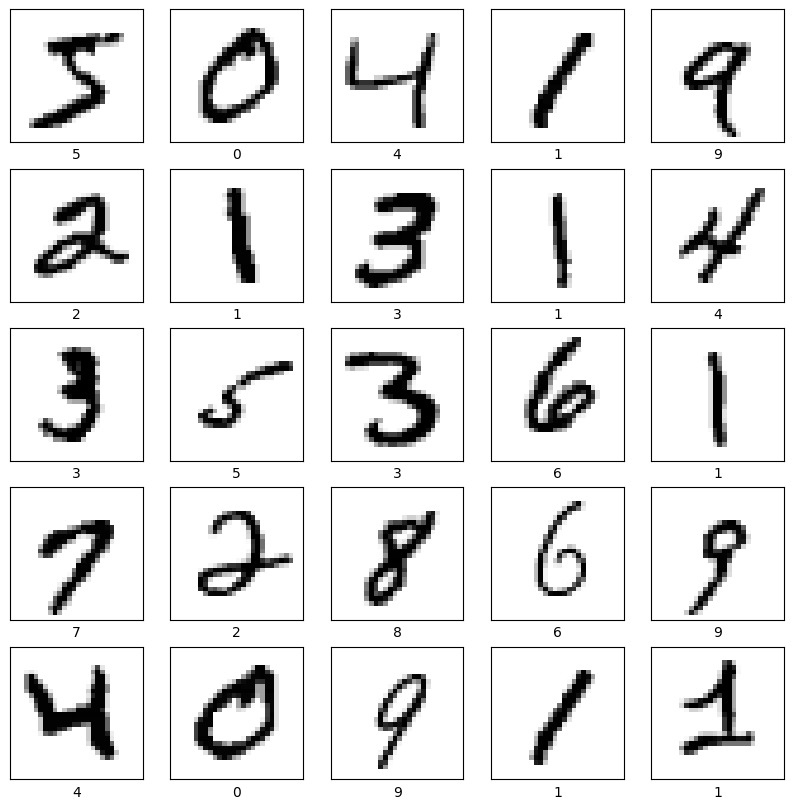

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells,num_cells,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()


In [ ]:
x_train_with_channel = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
    )
x_test_with_channel = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
    )

In [ ]:
print("x_tain_with_channel:",x_train_with_channel.shape)
print("x_test_with_channel:",x_test_with_channel.shape)

x_tain_with_channel: (60000, 28, 28, 1)
x_test_with_channel: (10000, 28, 28, 1)


In [ ]:
x_tarin_normalized = x_train_with_channel / 255
x_test_normalized = x_test_with_channel /255

In [ ]:
x_train = x_tarin_normalized
x_test = x_test_normalized

In [ ]:
x_tarin_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 20, 20, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,642 (818.91 KB)

 Trainable params: 209,642 (818.91 KB)

 Non-trainable params: 0 (0.00 B)

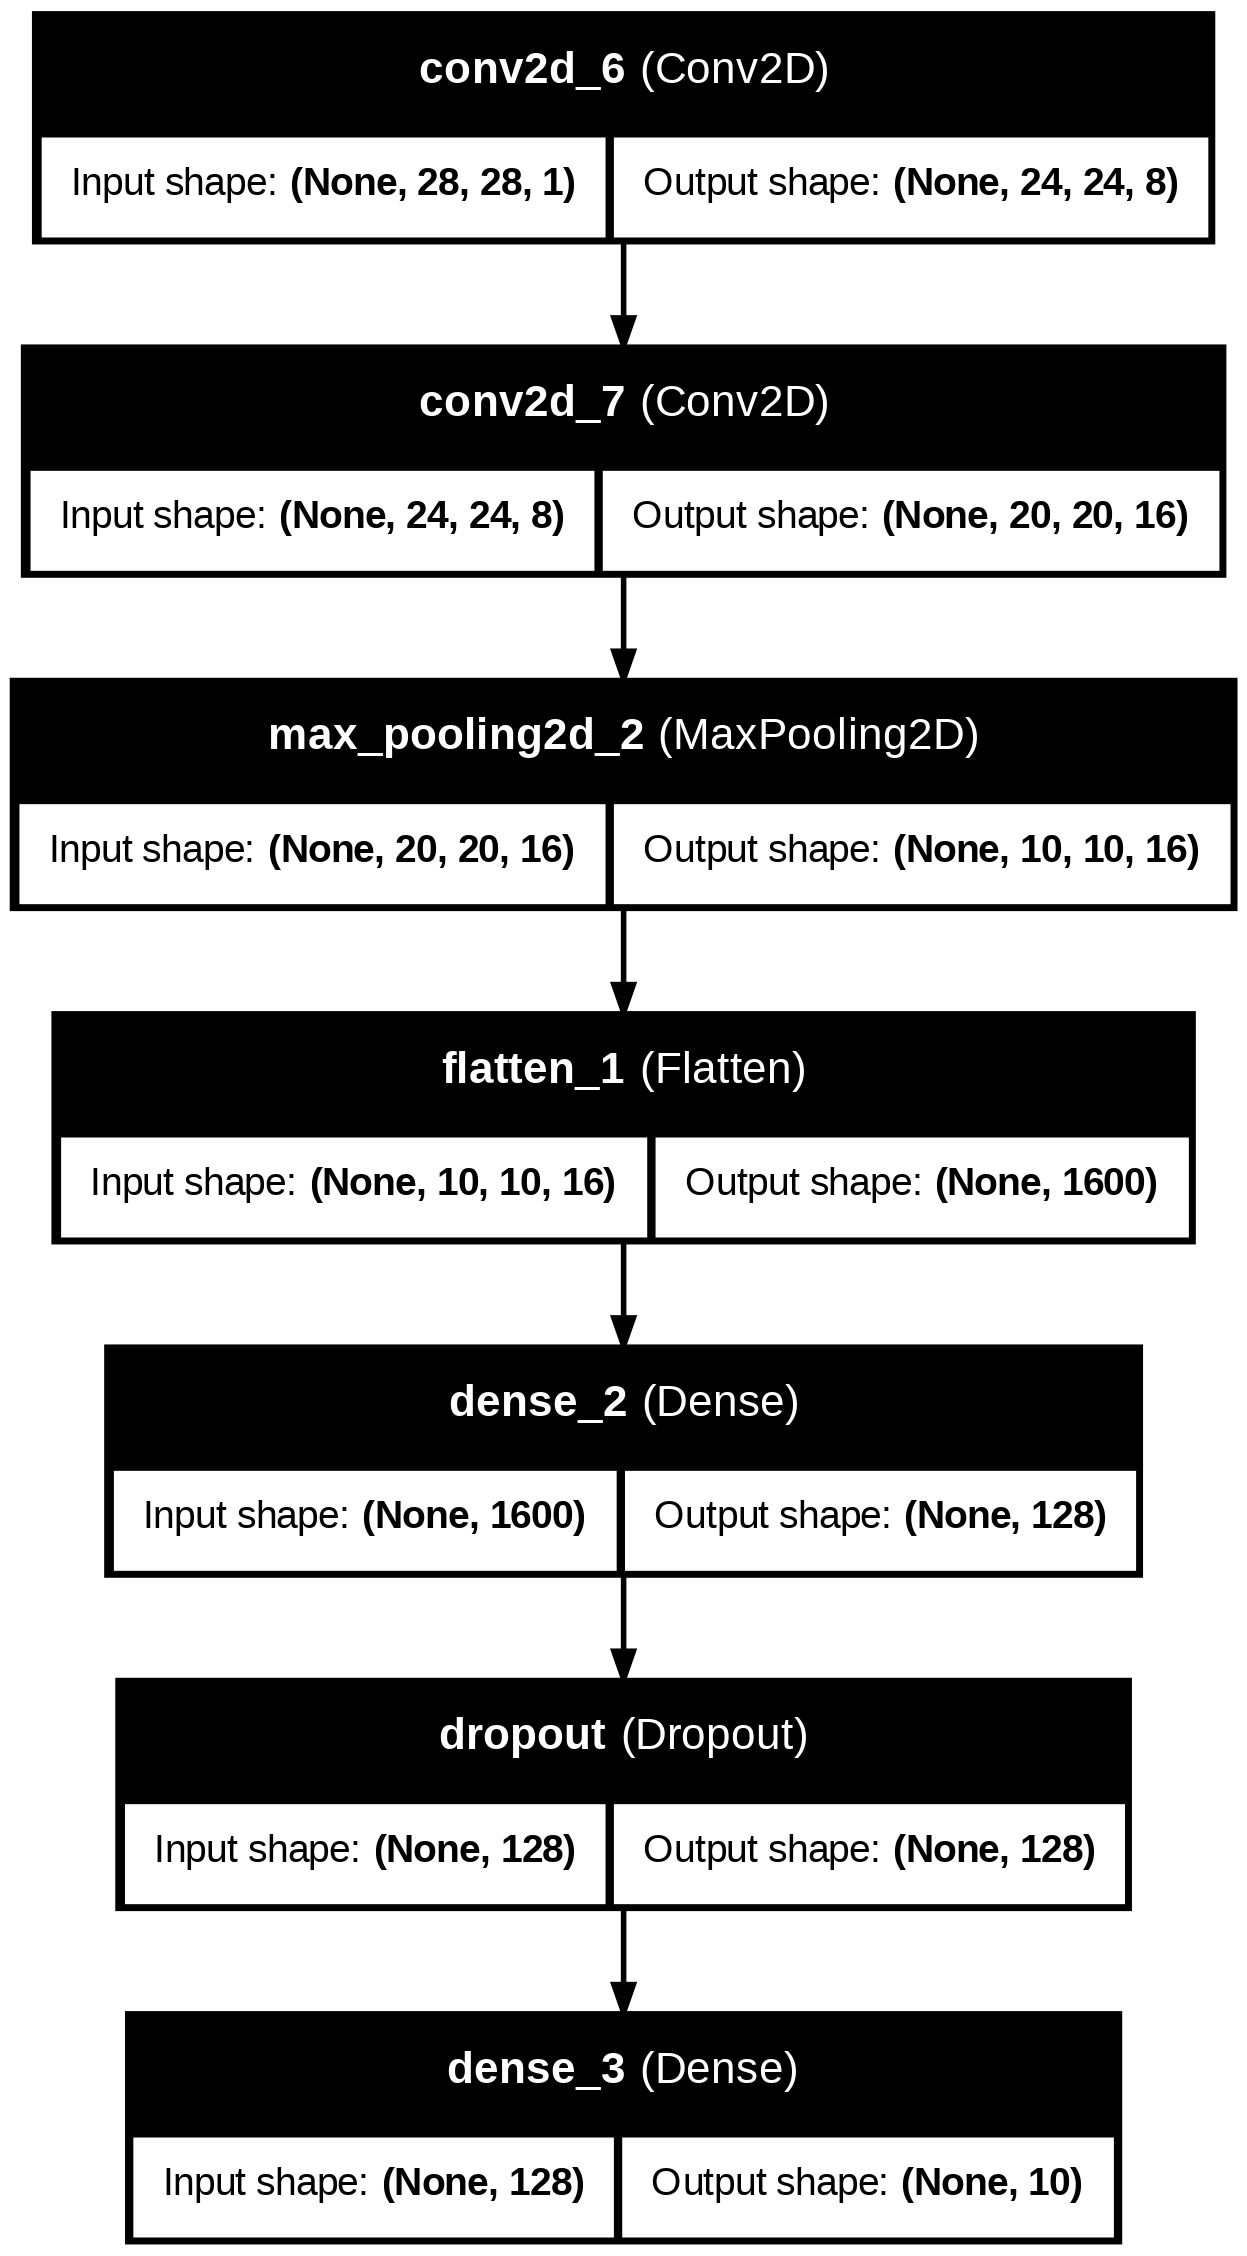

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    )

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test,y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.9088 - loss: 0.2855 - val_accuracy: 0.9816 - val_loss: 0.0538
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9843 - loss: 0.0508 - val_accuracy: 0.9875 - val_loss: 0.0361
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9885 - loss: 0.0363 - val_accuracy: 0.9899 - val_loss: 0.0341
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9897 - val_loss: 0.0331
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9939 - loss: 0.0207 - val_accuracy: 0.9891 - val_loss: 0.0351
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9913 - val_loss: 0.0266
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9895 - val_loss: 0.0374
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 34ms/step - accuracy: 0.9960 -

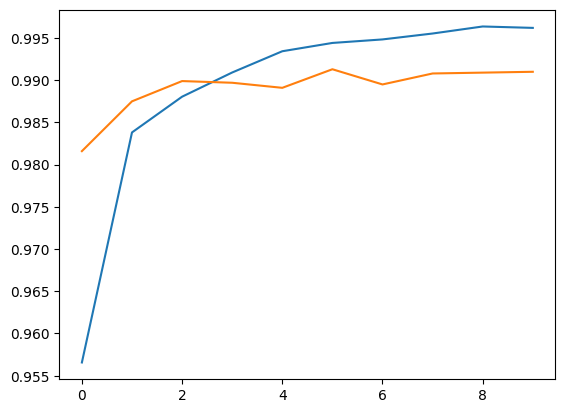

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])

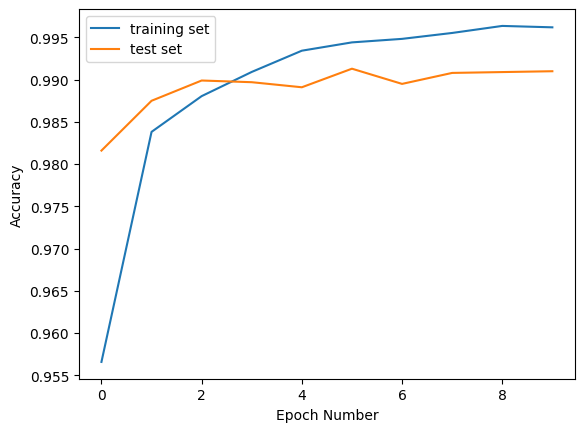

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
%%capture
train_loss,train_accuracy=model.evaluate(x_train,y_train)
test_loss,test_accuracy=model.evaluate(x_test,y_test)

In [ ]:
print('train loss:',train_loss)
print('train accuracy:',train_accuracy)
print('test loss:',test_loss)
print('test accuracy:',test_accuracy)

train loss: 0.003257956588640809
train accuracy: 0.9989166855812073
test loss: 0.03531594201922417
test accuracy: 0.9909999966621399


In [ ]:

print('validation loss:',train_loss)
print('validation accuracy:',train_accuracy)
print('test loss:',test_loss)
print('test accuracy:',test_accuracy)


validation loss: 0.003257956588640809
validation accuracy: 0.9989166855812073
test loss: 0.03531594201922417
test accuracy: 0.9909999966621399


In [ ]:
model_name = 'digit_recognition_cnn.h5' # or 'digit_recognition_cnn.keras'
model.save(model_name)
lodede_model = tf.keras.models.load_model(model_name)

In [ ]:
predactions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
pred

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
print('predictions_one_hot:',predictions_one_hot.shape)
pd.DataFrame(predictions_one_hot)

predictions_one_hot: (10000, 10)


,0,1,2,3,4,5,6,7,8,9
0,7.114227e-16,6.867097e-13,4.694714e-13,9.022885e-15,1.856696e-12,5.517173e-17,3.299374e-23,9.999999e-01,6.187836e-16,1.242931e-11
1,3.008556e-13,9.531263e-12,9.999999e-01,1.931934e-19,7.294690e-18,1.696868e-25,2.067427e-11,6.035313e-20,1.735575e-14,1.192429e-20
2,4.397508e-13,9.999999e-01,1.070812e-13,2.093954e-18,4.424623e-10,1.352706e-11,1.231860e-10,3.154954e-10,1.478894e-11,1.777083e-13
3,9.999954e-01,8.926272e-14,4.271891e-14,2.484828e-11,4.973872e-13,3.840146e-10,4.127025e-06,2.654761e-10,1.808123e-09,3.858610e-07
4,1.265063e-13,1.663645e-13,1.652023e-12,4.182996e-20,9.999999e-01,1.058445e-14,3.144686e-14,8.226787e-14,1.677217e-14,8.235946e-09
...,...,...,...,...,...,...,...,...,...,...
9995,1.042556e-16,3.621835e-13,9.999999e-01,1.138003e-17,1.467122e-18,4.357396e-29,7.879613e-20,1.145283e-12,3.530314e-15,4.949157e-21
9996,9.451282e-11,2.603906e-09,2.837672e-10,9.999993e-01,3.576957e-15,5.643485e-07,9.950887e-12,6.378673e-11,1.223958e-09,3.517856e-08
9997,4.097719e-23,6.435366e-15,7.628070e-20,7.541532e-27,9.999999e-01,5.864965e-16,8.443512e-18,8.648069e-17,5.726769e-15,2.447095e-14
9998,4.393254e-11,1.721081e-17,1.725244e-22,1.734802e-12,2.203247e-23,9.999999e-01,1.116898e-12,1.316697e-17,4.841672e-09,2.749990e-14


In [ ]:
predactions = np.argmax(predictions_one_hot,axis=1)
pd.DataFrame(predactions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


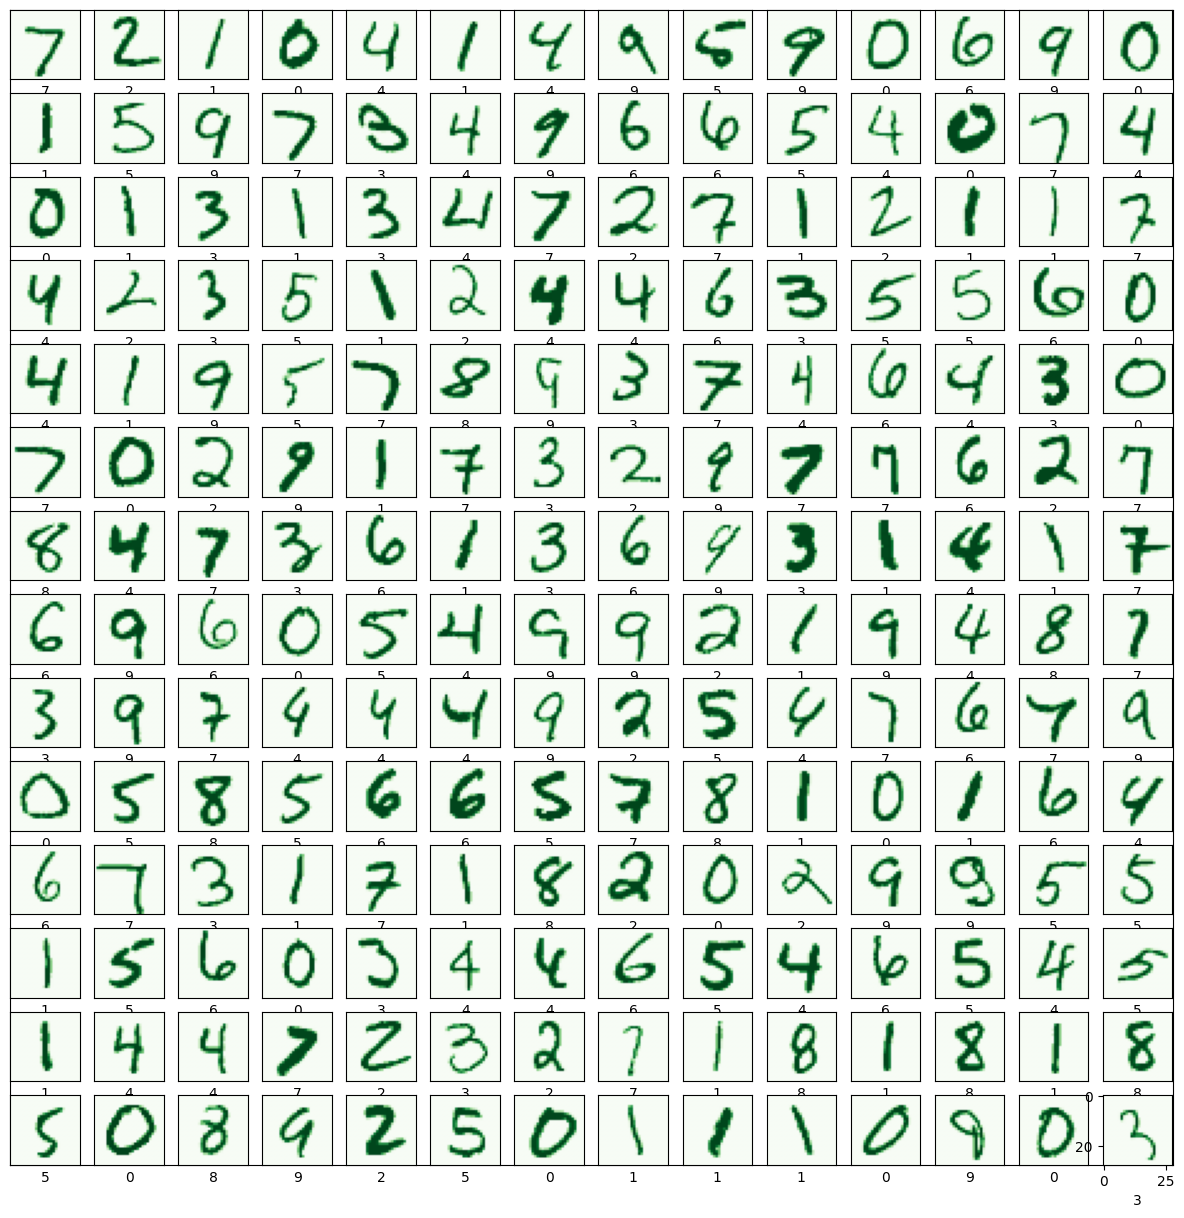

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    # Use 'predactions' instead of 'predictions'
    predicted_label = predactions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()